# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 0.1 Carregando dataset

In [2]:
df = pd.read_csv('previsaocolheita.csv')

In [3]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


Vamos criar um modelo capaz de prever os rendimentos da colheita através dos nutrientes do solo.

**Uma pequena legenda para me ajudar**



*   **Nitrogen** - proporção de nitrogênio no solo..
*   **Phosphorus** - proporção de fósforo no solo.
*   **Potassium** -  proporção de potássio no solo.
*   **Temperature** - temperatura em graus Celsius.
*   **Humidity** - humidade relativa em porcentagem.
*   **pH_Value** - valor do pH do solo.
*   **Rainfall** - chuva em mm






# 0.2 Analisando

In [4]:
df.head()
# As cinco primeiras linhas do dataframe.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [5]:
df.tail()
# As cinco ultimas linhas do dataframe.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [6]:
df.shape
# literalmente o corpo do dataframa, suas linhas e colunas no total.

(2200, 9)

In [7]:
df.columns
# nome de todas as colunas.

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'Yield'],
      dtype='object')

In [8]:
df.duplicated().sum()
# vereficando se possuimos dados duplicados.

0

In [9]:
df.isnull().sum()
# vereficando se a valores nulos.

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [10]:
df.info()
# Informaçoes resumidas do dataframe
# tbm podemos verificar se valores faltantes e os tipos de dados das colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [11]:
df.describe()
# Resume as informações estatiscas.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [12]:
df.nunique()
# contagem dos elementos unicos do dataframe

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
Yield           502
dtype: int64

In [13]:
df['Crop'].unique()
# monstrando os valores unicos do Crop

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [14]:
df['Crop'].value_counts()
# mostrando as ocorrencia de  valores unicos em Crop

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [15]:
crop_summary = pd.pivot_table(df, index=['Crop'], aggfunc='mean')
crop_summary

# Criando um tabela de resumo do dataframe.
# Ele agrega os dados de Crop e calcula estatiscas resumidas usando a media.

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [16]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new
# colocamos os index

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


# 0.3 Visualização dos dados.

In [17]:
df1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
# foi acriado um dataframe com as colunas de interesse.

## BOX PLOT


*   Diagrama de box-plot, é uma representação gráfica da distribuição de um conjunto de dados.
*   Ele consiste em uma "caixa" que representa o intervalo interquartil (IQR) contendo os 50% centrais dos dados, com uma linha dentro da caixa representando a mediana.
*   "Whiskers" se estendem da caixa até os valores minimo e máximo dentro de um intervalo especificado, muitas vezes definido por um critério estatístico.
*   Valores atípicos (outliers) também podem ser exibidos como pontos individuais além dos "Whiskers"

Usos:
*   **Resumo visual:** Fornece um resumo da distribuição dos dados, tendência central e dispersão.
*   **Comparação:** Facilita a comparação fácil de distribuições entre diferentes grupos dentro de um conjunto de dados.
*   **identificação de outliers:** Ajuda a identificar possiveis valores atipicos(outliers)



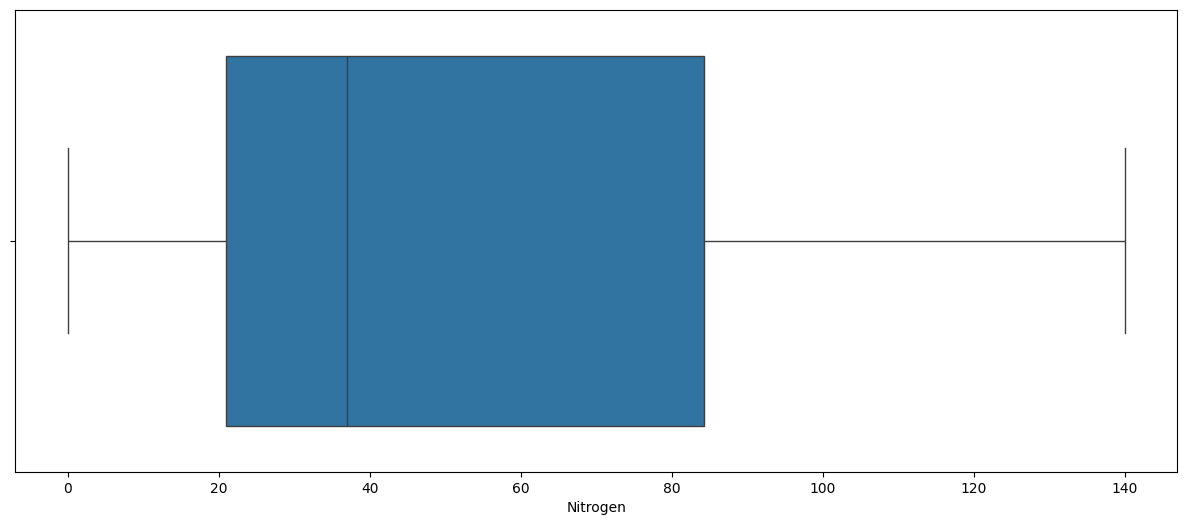

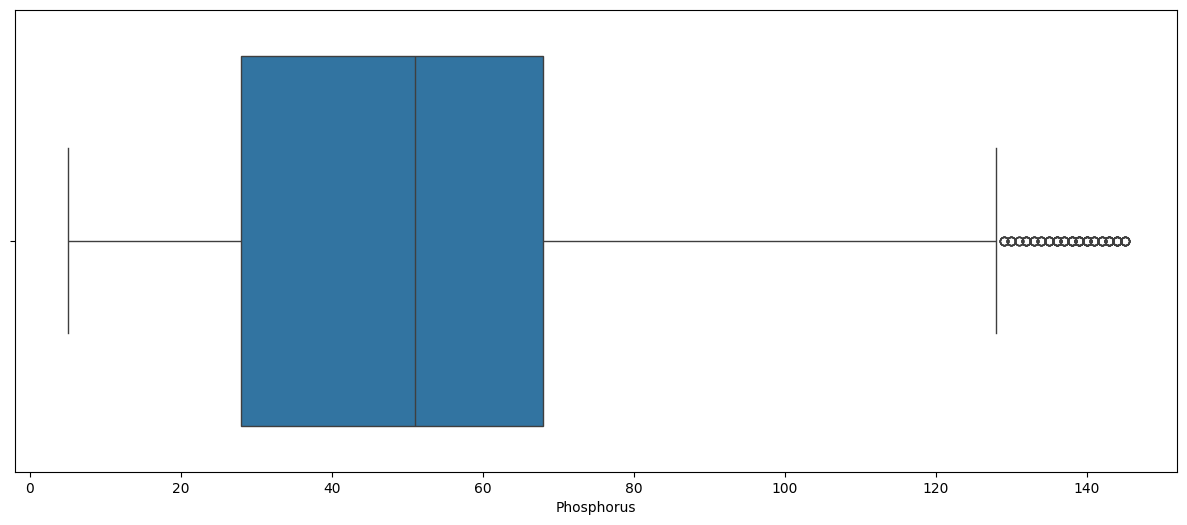

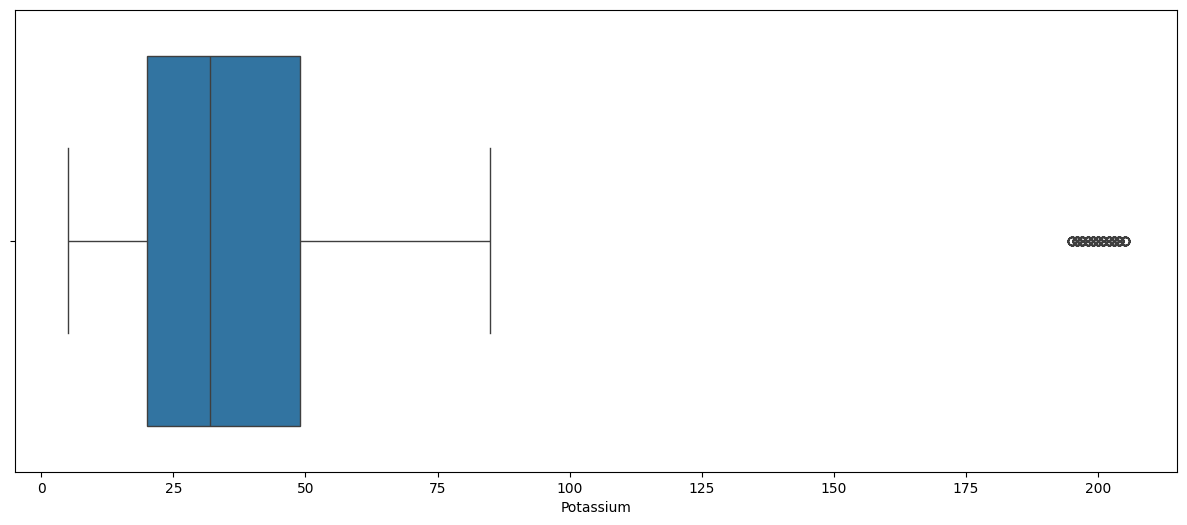

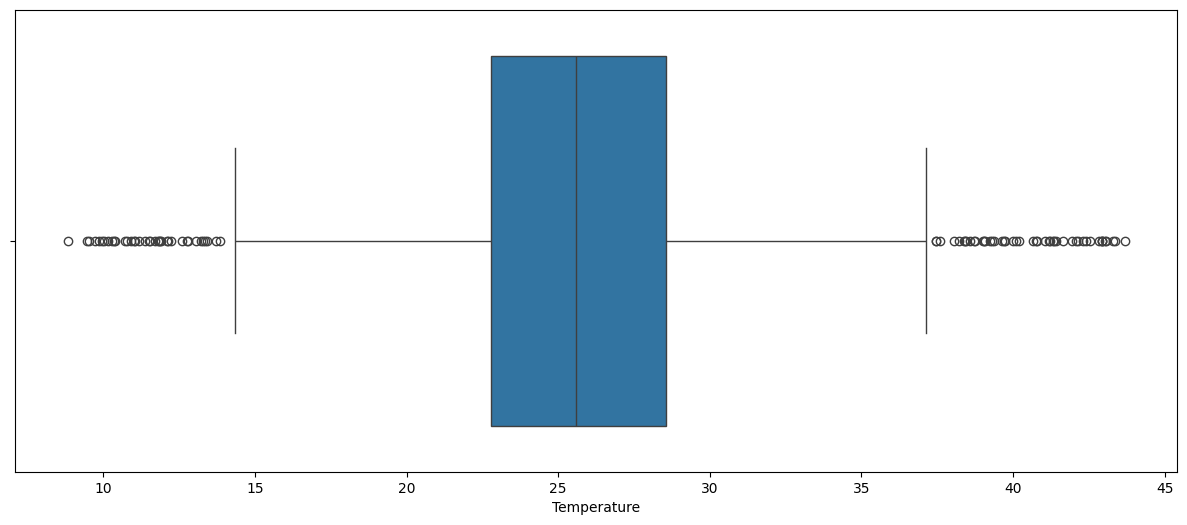

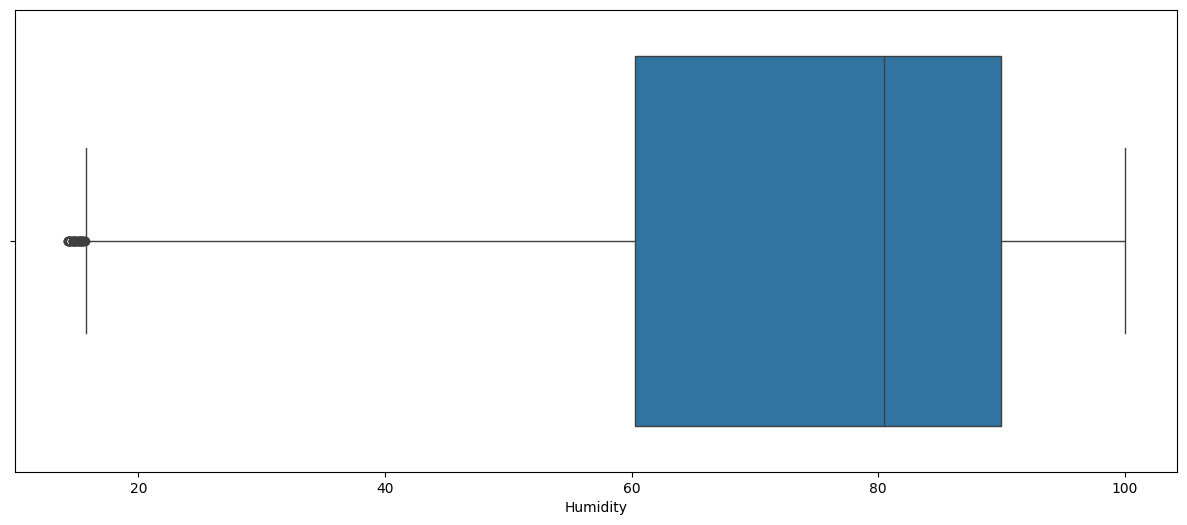

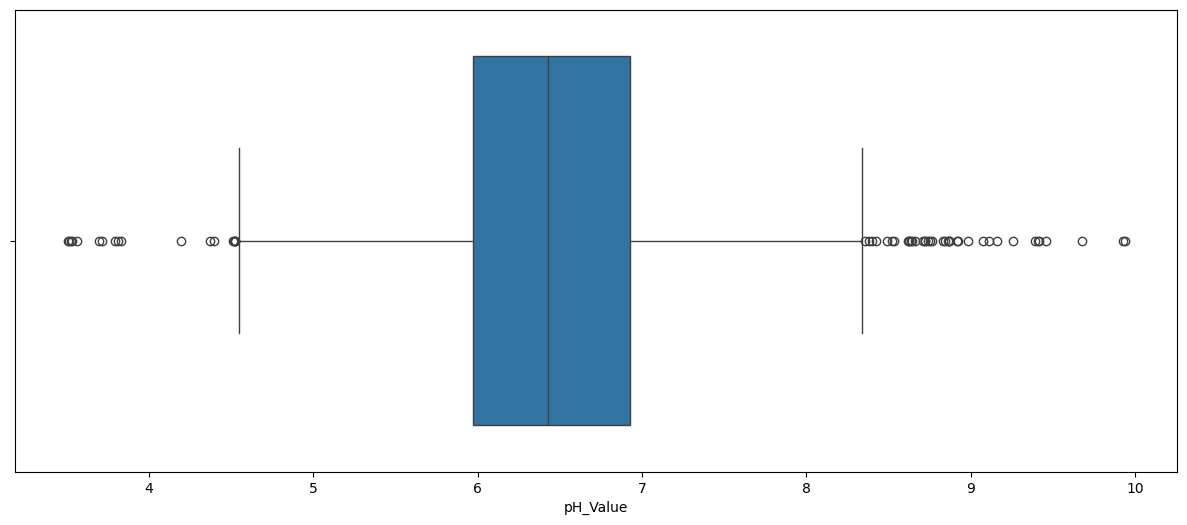

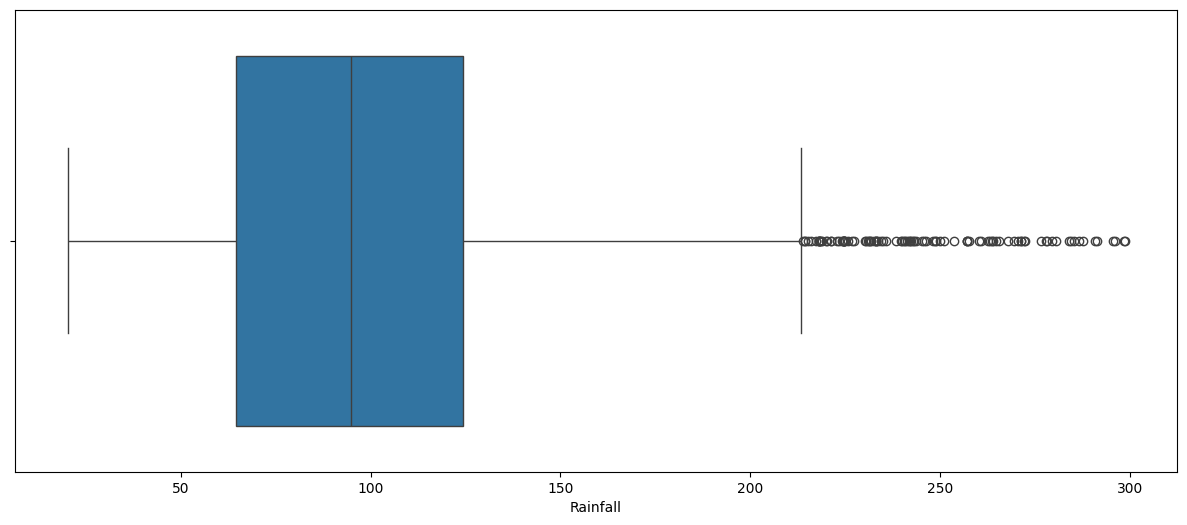

In [18]:
for i in df1.columns:
# iniciando um lopp que intera em cada coluna do dataframa df1
# df1. columns retorna os nomes das colunad do df1, e o loop percorre cada nome.
    plt.figure(figsize = (15,6))
    sns.boxplot(x = df1[i])
    plt.show()


## BAR PLOT
*  O bar plot (grafico de colunas) é um grafico utilizado para representação de dados categóricos.
*  O tamanho de cada coluna representa a soma ou frenquencia dos dados.
*  É frequentemente utilizado para comparar valores

Usos:

*  **Comparação entre categorias:** Compare valores de uma variável categórica entre diferente categorias.
*  **Distribuição de frenquência:** Exibe a frequência com que cada categoria ocorre no conjunto de dados
*  **Análise de tendências:** Mostra tendências ou padrões ao longo do tempo usando uma variável categórica.

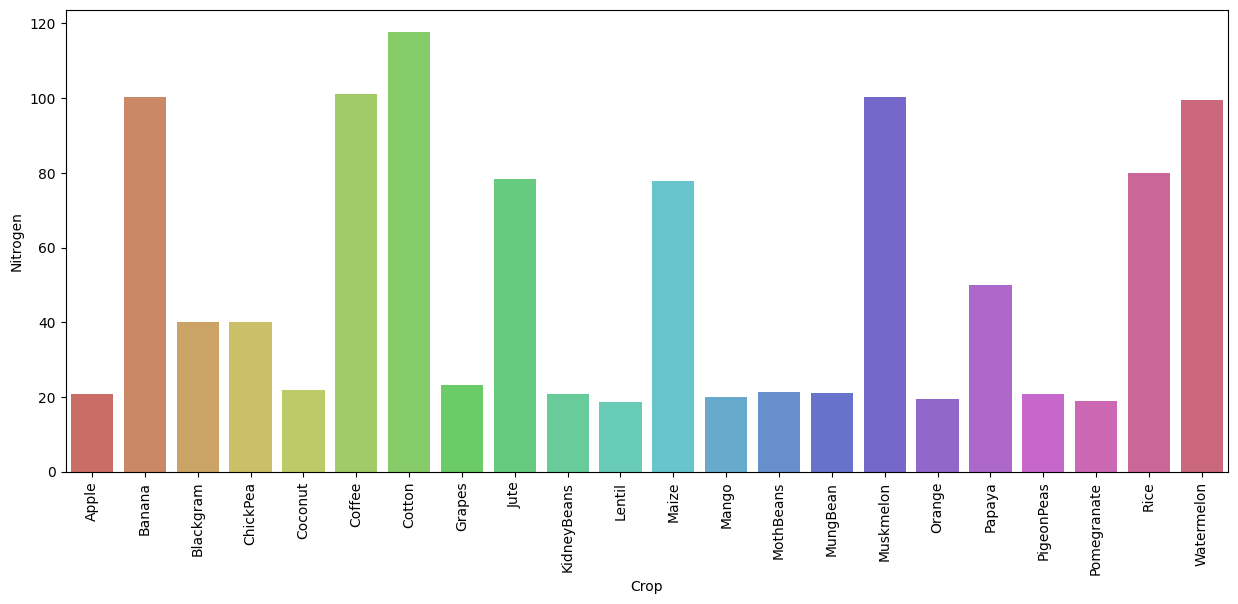

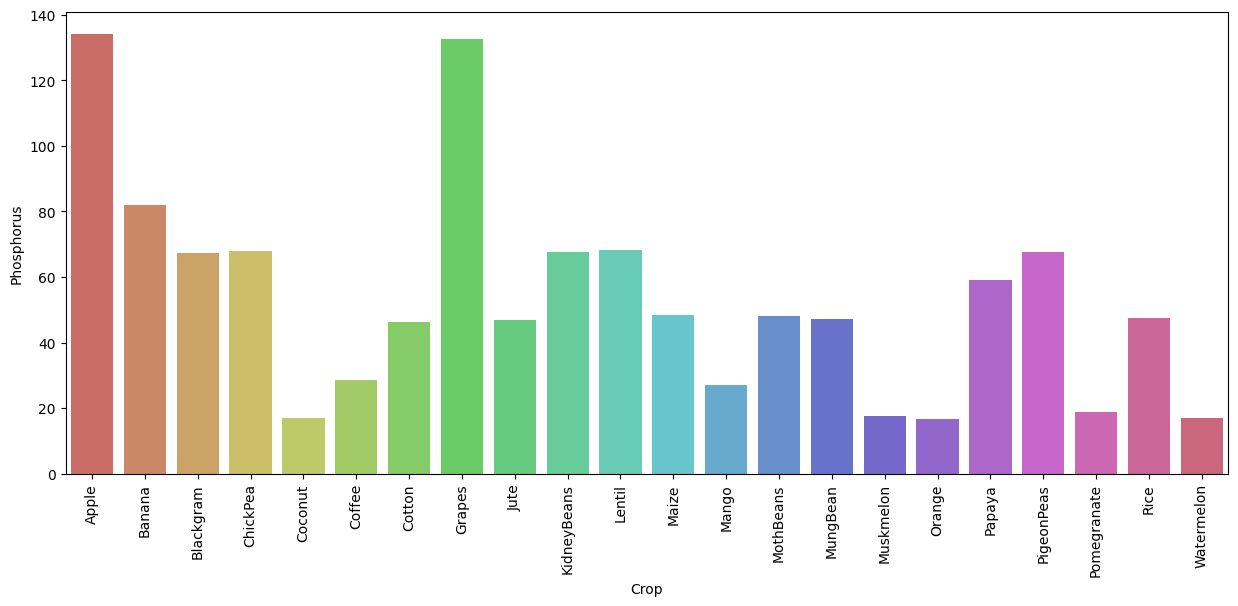

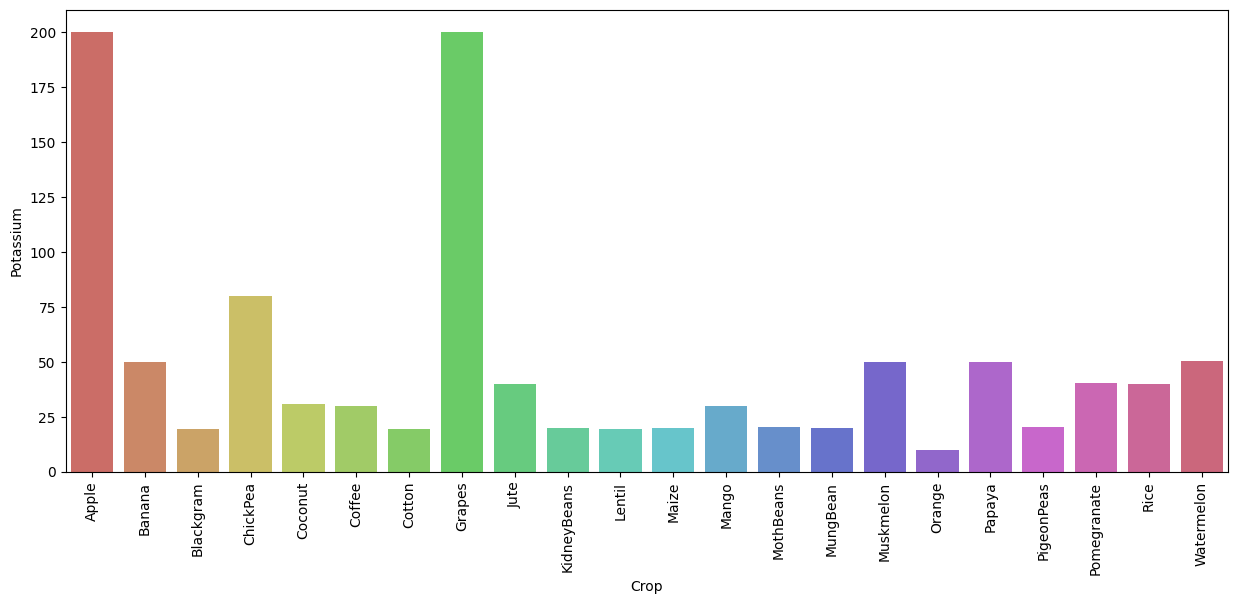

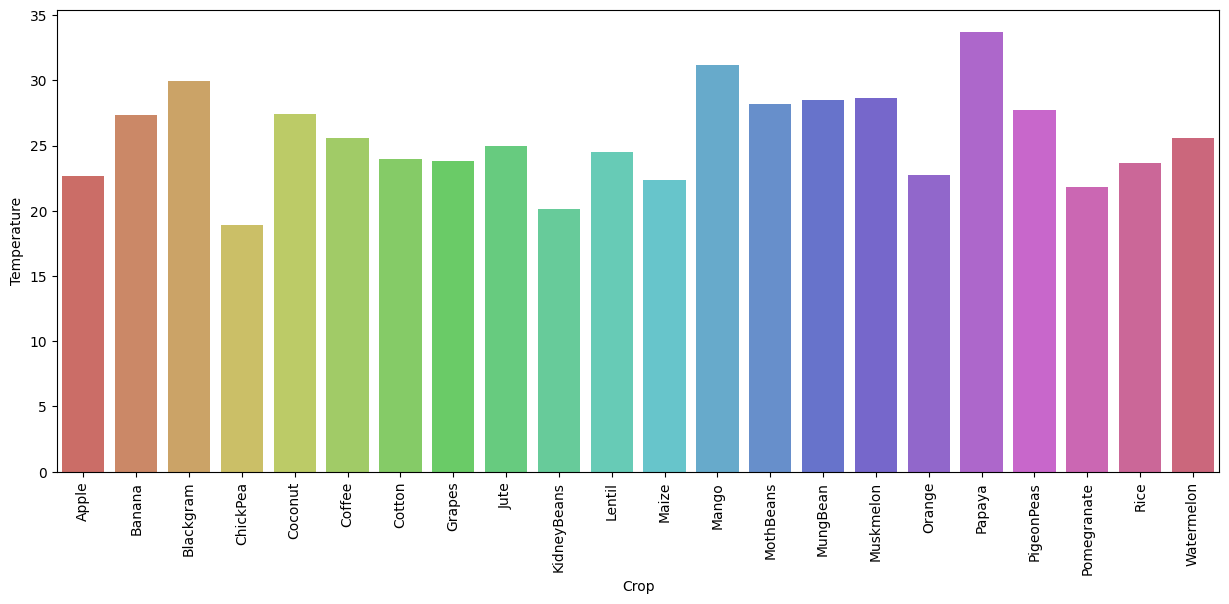

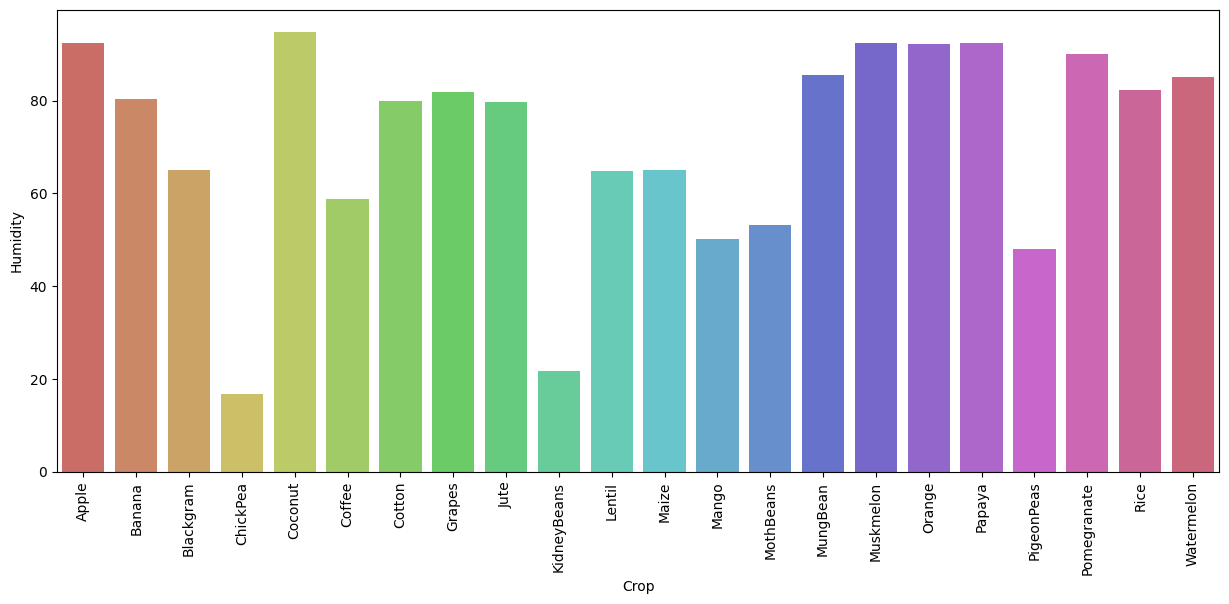

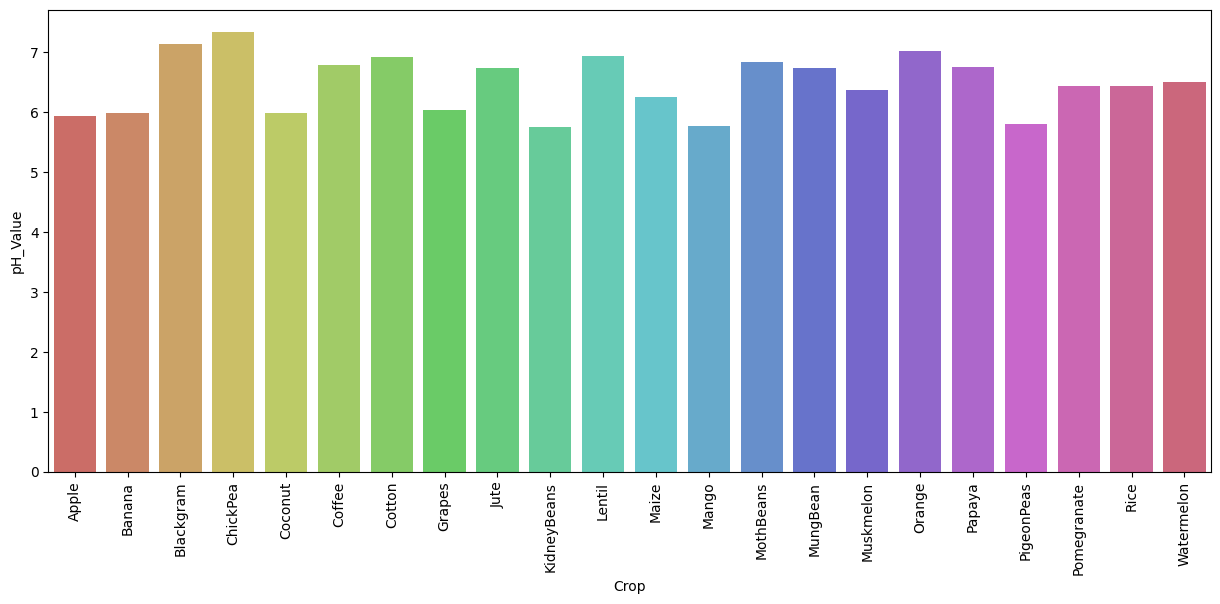

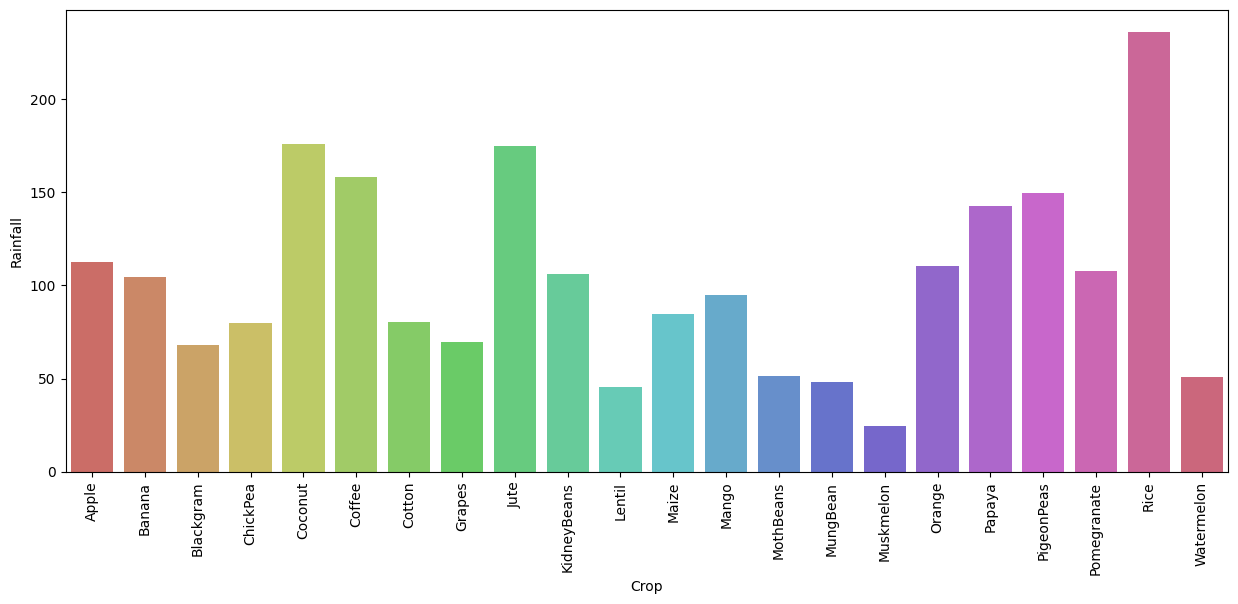

In [48]:
for i in df1.columns:

    plt.figure(figsize = (15, 6))
    sns.barplot(x = 'Crop', y = i, data = crop_summary_new, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()


## CORRELAÇÃO

*  Correlação é uma medida estatísca que quantifica a força e direção da relação linear entre duas variáveis.
*  Ela varia -1 a 1, onde:
   1. 1 Indica uma relação linear positiva perfeita,
   2. -1 Indica uma relação negativa perfeita, e
   3. 0 Indica nenhuma relação linear.

Usos:

*  **Visualizar a força e direção da relação entre duas variáveis:** O gráfico mostra se as variáveis tendem a aumentar ou diminuir juntas, e quão forte é essa tendência.
*  **Identificar outliers:** Pontos distantes do padrão geral podem indicar valores atípicos que merecem atenção especial
*  **Avaliar a qualidade de modelos de previsão:** Se você está prevendo uma variável com base em outra, o gráfico ajuda a verificar se a relação entre elas é forte o suficiente para garantir boas previsões.






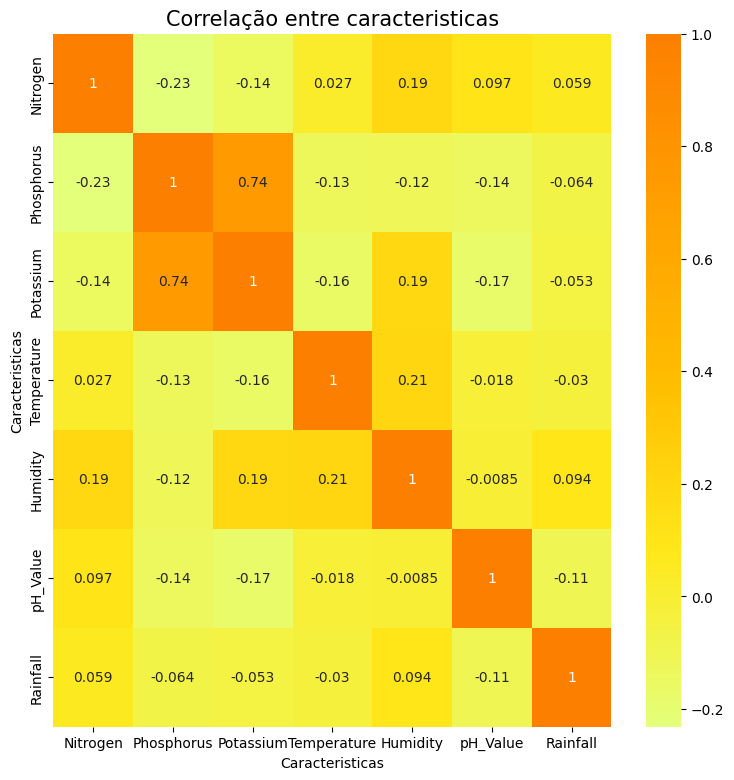

In [20]:
df1.corr()
# calcula a correlaçao das colunas do df1

fig, ax = plt.subplots(1, 1, figsize = (9,9))


sns.heatmap(df1.corr(), annot = True, cmap = 'Wistia')
# gera um mapa de calor usando a função heatmap do Seaborn.

ax.set(xlabel = 'Caracteristicas')
ax.set(ylabel = 'Caracteristicas')

plt.title('Correlação entre caracteristicas', fontsize = 15, c = 'black')
plt.show()


# 0.4 Processamento de dados.

## CONVERSÃO DE DADOS CATEGÓRICOS PARA NUMÉRICOS
*  Esta é uma etapa comum de pré-processamento em aprendizado de máquina, especialmente ao lidar com dados categóricos que precisam ser convertidos em um formato adequado para treinamento de modelos.

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# cria uma instância da classe LabelEncoder (Codificador de Rótulos)

df['Crop'] = le.fit_transform(df['Crop'])
# Esta linha aplica a transformação de codificação de rótulos à coluna 'Crop' no dataframe df.
# O método fit_transform() de LabelEncoder ajusta o codificador às categorias únicas na coluna 'Crop' (fit)
# e então as transforma em rótulos numéricos (transform).

# O LabelEncoder mapeia cada valor categórico único na coluna 'Crop' a um rótulo numérico correspondente.
# Por exemplo, se 'Wheat', 'Corn', e 'Rice' são nomes únicos de plantações na coluna 'Crop',
# eles podem ser codificados como 0, 1, e 2, respectivamente.


## ASSIMETRIA (SKEW)
*  Um valor de assimetria igual a 0 indica uma distribuição simétrica.
*  Assimetria possitiva (skew > 0) significa que os dados estão eviesados para a direita, com uma cauda se estendendo em direção a valores mais altos.
*  Assimetria negativa (skew < 0) indica uma distribuição enviesada para a esquerda, com uma cauda se estendo em direção a valores mais baixos.

In [22]:
df.skew()
# calcula a assimetria de cada coluna numérica do dataframe.

Nitrogen        0.509721
Phosphorus      1.010773
Potassium       2.375167
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [23]:
df['Phosphorus'] = np.log(df['Phosphorus'])

df['Potassium'] = np.log(df['Potassium'])

# para os dados assimetricos à direita usamos a transformação logarítmica.


df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [24]:
df['Humidity'] = (df['Humidity'])** 2

# para dados assimetricos a esquerda usamos a transformação exponencial( elevamos ao quadrado)

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -0.522852
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [25]:
iq1 = df['Yield'].quantile(0.25)
#Calcula o primeiro quartil da coluna Yield

iq2 = df['Yield'].quantile(0.75)
# Calcula o terceiro quartil (Q3) da coluna 'Yield', que representa o valor abaixo do qual 75% dos dados se encontram.
# o segundo quartil (Q2) é equivalente à mediana e geralmente é calculado separadamente.
print(iq1)

print(iq2)

df['Yield'] = np.where(df['Yield']<iq1,iq1,df['Yield'])
# Substitui os valores na coluna 'Yield' que estão abaixo de Q1 por Q1.

df['Yield'] = np.where(df['Yield']>iq2,iq2,df['Yield'])
# Substitui os valores na coluna 'Yield' que estão acima de Q3 por Q3.

df.skew()

950.0
3500.0


Nitrogen       0.509721
Phosphorus    -0.782108
Potassium      0.804010
Temperature    0.184933
Humidity      -0.522852
pH_Value       0.283929
Rainfall       0.965756
Crop           0.000000
Yield          0.283069
dtype: float64

## Dividindo em dataset de treino e dataset de teste

In [26]:
X = df.iloc[:,0:8]
# Extrai as primeiras 8 colunas do dataframe 'df' usando indexação baseada em inteiros (iloc).
# A sintaxe [:, 0:8] significa selecionar todas as linhas (:) e colunas do índice 0 até o índice 8 (excluindo o 8).
# Estas colunas representam as características ou variáveis independentes.

y = df.iloc[:,8]
# Extrai a 9ª coluna (índice 8) do dataframe 'df' usando indexação baseada em inteiros (iloc).
# A sintaxe [:, 8] significa selecionar todas as linhas (:) e apenas a coluna no índice 8.
# Esta coluna representa a variável alvo ou variável dependente.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# X e y são considerados a matriz de características e a variável alvo, respectivamente.
# test_size = 0.2 especifica que 20% dos dados serão usados para teste e os 80% restantes serão usados para treinamento.
# shuffle = True (padrão) indica que os dados serão embaralhados antes da divisão, o que ajuda a randomizar as amostras.
# random_state = 0 (padrão: None) define a semente aleatória para reprodutibilidade, garantindo que as mesmas divisões aleatórias sejam geradas sempre.

# Após executar este código, teremos:

# 1) X_train: O conjunto de treinamento de características.
# 2) X_test: O conjunto de teste de características.
# 3) y_train: O conjunto de treinamento de valores alvo.
# 4) y_test: O conjunto de teste de valores alvo.


# 0.5 Criando Modelos

In [28]:
from sklearn.metrics import mean_squared_error

## 1) Regressão Linear


FUNCIONAMENTO
* **Armazenamento de Dados:** A Regressão Linear armazena os coeficientes e o intercepto derivados dos dados de treinamento como seu "modelo".

* **Cálculo da Relação:** Calcula uma relação linear entre as características de entrada e a variável alvo utilizando os coeficientes.

* **Previsão:** A Regressão Linear prevê a variável alvo multiplicando as características de entrada pelos coeficientes correspondentes e adicionando o intercepto.

* **Princípio de Funcionamento:** A Regressão Linear assume uma relação linear entre as características e a variável alvo, com o objetivo de minimizar a soma dos quadrados dos resíduos (a diferença entre os valores reais e os valores previstos).

In [29]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
# Cria um objeto de modelo de Regressão Linear chamado regressor_lr.
# Este objeto pode ser treinado em dados e usado para fazer previsões em tarefas de regressão.

regressor_lr.fit(X_train, y_train)
# Treina o modelo de Regressão Linear usando as características de entrada (X_train) e os valores alvo correspondentes (y_train).


LinearRegression()

In [30]:
y_pred_lr = regressor_lr.predict(X_test)
# Usado para fazer previsões usando um regressor linear treinado em um conjunto de teste (X_test).
# Os valores previstos para a variável alvo são armazenados na variável y_pred_lr.
# Cada elemento de y_pred_lr corresponde ao valor previsto para a linha correspondente no conjunto de teste.


In [31]:
mse_lr = mean_squared_error(y_pred_lr, y_test)
# Calcula o Erro Quadrático Médio (MSE) das previsões feitas pelo regressor linear
# tomando a média da diferença ao quadrado entre os valores reais e previstos.

print("Erro Quadrático Médio (MSE) para Regressão Linear:", mse_lr)


Erro Quadrático Médio (MSE) para Regressão Linear: 1033830.4702856538


## 2) Arvore de decisão.

FUNCIONAMENTO
* **Particionamento de Dados:** A Árvore de Decisão para Regressão particiona o espaço de características em regiões com base nos valores das características.

* **Seleção de Divisão:** Ela seleciona as divisões de características ideais em cada nó para maximizar o ganho de informação ou minimizar a impureza (por exemplo, redução de variância para regressão).

* **Previsão nos Nós Folha:** Cada nó folha na árvore de decisão prevê a variável alvo com base na média das amostras de treinamento que caem naquele nó.

* **Princípio de Funcionamento:** A Árvore de Decisão para Regressão divide recursivamente os dados com base em limiares de características, criando uma estrutura de árvore para fazer previsões.

In [32]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
# Cria um objeto de modelo de Árvore de Decisão para Regressão chamado regressor_dt.
# Este objeto pode ser treinado em dados e usado para fazer previsões em tarefas de regressão.

regressor_dt.fit(X_train, y_train)
# Treina o modelo de Árvore de Decisão para Regressão usando as características de entrada (X_train) e os valores alvo correspondentes (y_train).


DecisionTreeRegressor()

In [33]:
y_pred_dt = regressor_dt.predict(X_test)
# Usado para fazer previsões usando um regressor de árvore de decisão treinado em um conjunto de teste (X_test).
# Os valores previstos para a variável alvo são armazenados na variável y_pred_dt.
# Cada elemento de y_pred_dt corresponde ao valor previsto para a linha correspondente no conjunto de teste.


In [34]:
mse_dt = mean_squared_error(y_pred_dt, y_test)
# Calcula o Erro Quadrático Médio (MSE) das previsões feitas pelo regressor de árvore de decisão
# tomando a média da diferença ao quadrado entre os valores reais e previstos.

print("Erro Quadrático Médio (MSE) para Regressão por Árvore de Decisão:", mse_dt)


Erro Quadrático Médio (MSE) para Regressão por Árvore de Decisão: 1843287.8431818183


## 3) Random Forest


FUNCIONAMENTO
* **Aprendizagem por Conjunto (Ensemble Learning):** A Floresta Aleatória para Regressão constrói múltiplas árvores de decisão (floresta) usando subconjuntos aleatórios de características e pontos de dados.

* **Construção de Árvores:** Cada árvore de decisão é construída de forma independente para prever os valores alvo.

* **Agregação:** As previsões de todas as árvores são agregadas (por exemplo, através de média para regressão) para obter a previsão final.

* **Amostragem Bootstrap:** A floresta aleatória usa amostragem bootstrap para criar árvores diversas e reduzir o overfitting (sobreajuste).

In [35]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
# Cria um objeto de modelo de Floresta Aleatória para Regressão chamado regressor_rf.
# Este objeto pode ser treinado em dados e usado para fazer previsões em tarefas de regressão.

regressor_rf.fit(X_train, y_train)
# Treina o modelo de Floresta Aleatória para Regressão usando as características de entrada (X_train) e os valores alvo correspondentes (y_train).


RandomForestRegressor()

In [36]:
y_pred_rf = regressor_rf.predict(X_test)
# Usado para fazer previsões usando um regressor de floresta aleatória treinado em um conjunto de teste (X_test).
# Os valores previstos para a variável alvo são armazenados na variável y_pred_rf.
# Cada elemento de y_pred_rf corresponde ao valor previsto para a linha correspondente no conjunto de teste.


In [37]:
mse_rf = mean_squared_error(y_pred_rf, y_test)
# Calcula o Erro Quadrático Médio (MSE) das previsões feitas pelo regressor de floresta aleatória
# tomando a média da diferença ao quadrado entre os valores reais e previstos.

print("Erro Quadrático Médio (MSE) para Regressão por Floresta Aleatória:", mse_rf)


Erro Quadrático Médio (MSE) para Regressão por Floresta Aleatória: 1018882.0830372728


## 4) Support Vector Regressor


FUNCIONAMENTO
* **Criação do Hiperplano:** A Regressão por Vetor de Suporte (SVR) encontra o hiperplano ideal que melhor separa os pontos de dados no espaço de características, maximizando a margem.

* **Maximização da Margem:** Busca maximizar a margem entre o hiperplano e os pontos de dados mais próximos (vetores de suporte).

* **Truque do Kernel (Opcional):** O SVR pode usar funções kernel para transformar os dados em um espaço de maior dimensão, permitindo a separação não linear.

* **Previsão de Regressão:** Na regressão, o SVR prevê valores contínuos da variável alvo com base na distância dos pontos de dados em relação ao hiperplano.

In [38]:
from sklearn.svm import SVR

regressor_svr = SVR()
# Cria um objeto de modelo de Regressão por Vetor de Suporte (SVR) chamado regressor_svr.
# Este objeto pode ser treinado em dados e usado para fazer previsões em tarefas de regressão.

regressor_svr.fit(X_train, y_train)
# Treina o modelo de Regressão por Vetor de Suporte usando as características de entrada (X_train) e os valores alvo correspondentes (y_train).


SVR()

In [39]:
y_pred_svr = regressor_svr.predict(X_test)
# Usado para fazer previsões usando um regressor de vetor de suporte treinado em um conjunto de teste (X_test).
# Os valores previstos para a variável alvo são armazenados na variável y_pred_svr.
# Cada elemento de y_pred_svr corresponde ao valor previsto para a linha correspondente no conjunto de teste.


In [40]:
mse_svr = mean_squared_error(y_pred_svr, y_test)
# Calcula o Erro Quadrático Médio (MSE) das previsões feitas pelo regressor de vetor de suporte
# tomando a média da diferença ao quadrado entre os valores reais e previstos.

print("Erro Quadrático Médio (MSE) para Regressão por Vetor de Suporte (SVR):", mse_svr)


Erro Quadrático Médio (MSE) para Regressão por Vetor de Suporte (SVR): 1147891.0975545463


## 5) K-Nearest Neightbor Regressor


FUNCIONAMENTO
* **Armazenamento de Dados:** A Regressão KNN armazena todo o conjunto de dados de treinamento como seu "modelo" para tarefas de regressão.

* **Cálculo de Distância:** Calcula distâncias (por exemplo, distância Euclidiana) entre os pontos de dados no espaço de características.

* **Seleção de Vizinhos:** KNN seleciona os k vizinhos mais próximos de um novo ponto de dados com base em métricas de distância.

* **Previsão de Regressão:** Para regressão, KNN prevê o valor alvo calculando a média dos valores alvo de seus k vizinhos mais próximos.

In [41]:
from sklearn.neighbors import KNeighborsRegressor

regressor_knn = KNeighborsRegressor()
# Cria um objeto de modelo de Regressão por K Vizinhos Mais Próximos (KNN) chamado regressor_knn.
# Este objeto pode ser treinado em dados e usado para fazer previsões em tarefas de regressão.

regressor_knn.fit(X_train, y_train)
# Treina o modelo de Regressão KNN usando as características de entrada (X_train) e os valores alvo correspondentes (y_train).


KNeighborsRegressor()

In [42]:
y_pred_knn = regressor_knn.predict(X_test)
# Usado para fazer previsões usando um regressor de k vizinhos mais próximos (KNN) treinado em um conjunto de teste (X_test).
# Os valores previstos para a variável alvo são armazenados na variável y_pred_knn.
# Cada elemento de y_pred_knn corresponde ao valor previsto para a linha correspondente no conjunto de teste.


In [43]:
mse_knn = mean_squared_error(y_pred_knn, y_test)
# Calcula o Erro Quadrático Médio (MSE) das previsões feitas pelo regressor de k-vizinhos mais próximos (KNN)
# tomando a média da diferença ao quadrado entre os valores reais e previstos.

print("Erro Quadrático Médio (MSE) para Regressão por K-Vizinhos Mais Próximos (Regressão KNN):", mse_knn)


Erro Quadrático Médio (MSE) para Regressão por K-Vizinhos Mais Próximos (Regressão KNN): 1245810.3739090909


## **Comparação dos modelos de regressão**

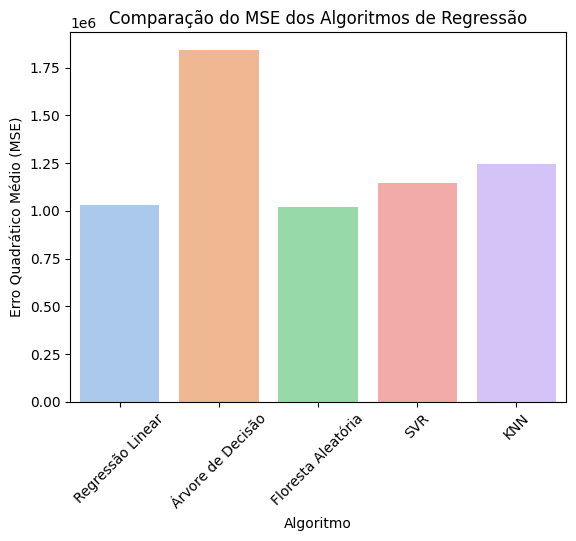

In [46]:
mse_scores = [mse_lr, mse_dt, mse_rf, mse_svr, mse_knn]
# Cria uma lista com os valores de Erro Quadrático Médio (MSE) para cada modelo.

algorithm_labels = ['Regressão Linear', 'Árvore de Decisão', 'Floresta Aleatória', 'SVR', 'KNN']
# Cria rótulos genéricos para cada modelo.

sns.barplot(x = algorithm_labels, y = mse_scores, palette = 'pastel')
# Cria um gráfico de barras usando Seaborn com os rótulos dos algoritmos.

plt.xlabel('Algoritmo')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Comparação do MSE dos Algoritmos de Regressão')
# Define os rótulos dos eixos e o título do gráfico.

plt.xticks(rotation = 45)
# Ajusta o ângulo de rotação dos rótulos do eixo x para 45 graus.

plt.show()
# Exibe o gráfico.


# PREVENDO OS GANHOS

In [ ]:
#regressor_lr.predict